In [1]:
import pymysql
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [2]:
_host = '168.131.39.95'
_port = 3306
_user = 'root'
_passwd = 'jslab0963'
_db = 'TYP'
db = pymysql.connect(host=_host, port=_port, user=_user, passwd=_passwd, db=_db, charset= 'utf8')
cursor = db.cursor()
typ_name = ['CHABA2', 'CHANHOM', 'GONI', 'HALOLA', 'HALONG', 'KONGREY2', 'MALAKAS', 'NAKRI2', 'NANGKA', 'NANMADOL', 'NEOGURI',
           'NORU', 'PRAPIROON', 'RUMBIA', 'SOULIK', 'TALIM', 'TRAMI', 'VONGFONG']

In [3]:
typ_lang = []
typ_long = []
WD = []
WV = []
WT = []

In [4]:
#데이터 전처리
temp = []
for name in typ_name:
    sql = " SELECT * from " + name
    cursor.execute(sql)
    result = cursor.fetchall()
    for row_data in result:
        typ_lang.append([row_data[1], row_data[2]])
        temp.append([row_data[3], row_data[4], row_data[5]])

#temp : 수온, 풍향, 풍속의 feature들 x_data
print(temp)

#typ_lang : 대한민국 역대 태풍들의 위, 경도 y_data
print(typ_lang)

[[110, Decimal('26.000'), Decimal('29.000')], [115, Decimal('29.000'), Decimal('29.400')], [135, Decimal('29.000'), Decimal('29.400')], [145, Decimal('23.000'), Decimal('29.500')], [145, Decimal('26.000'), Decimal('29.500')], [150, Decimal('27.000'), Decimal('29.500')], [160, Decimal('27.000'), Decimal('29.500')], [175, Decimal('26.000'), Decimal('29.100')], [145, Decimal('30.000'), Decimal('29.500')], [190, Decimal('25.000'), Decimal('28.700')], [165, Decimal('25.000'), Decimal('28.600')], [165, Decimal('27.000'), Decimal('29.000')], [170, Decimal('35.000'), Decimal('29.400')], [170, Decimal('44.000'), Decimal('28.700')], [190, Decimal('56.000'), Decimal('28.900')], [215, Decimal('61.000'), Decimal('28.600')], [210, Decimal('56.000'), Decimal('28.900')], [215, Decimal('57.000'), Decimal('29.200')], [205, Decimal('55.000'), Decimal('29.000')], [205, Decimal('52.000'), Decimal('29.200')], [185, Decimal('50.000'), Decimal('29.100')], [205, Decimal('56.000'), Decimal('29.100')], [200, Dec

In [5]:
temp = np.asarray(temp, dtype = np.float32)
scaler = MinMaxScaler(feature_range=(0., 1.))
temp = scaler.fit_transform(temp)
print(len(temp))
print(temp)

x_train = temp[0:260]
x_val = temp[260:520]
x_test = temp[520:784]

typ_lang = np.asarray(typ_lang, dtype = np.float32)
print(len(typ_lang))
print(typ_lang)
y_train = typ_lang[0:260]
y_val = typ_lang[260:520]
y_test = typ_lang[520:784]

784
[[0.2857143  0.13872832 0.84939766]
 [0.3        0.15606935 0.8734939 ]
 [0.35714287 0.15606935 0.8734939 ]
 ...
 [0.87142855 0.11560693 0.        ]
 [0.85714287 0.15606935 0.01807231]
 [0.9        0.29479766 0.03614461]]
784
[[ 15.8 158.1]
 [ 15.6 156.4]
 [ 15.2 154.6]
 ...
 [ 34.5 135.6]
 [ 36.7 139.5]
 [ 39.6 143.2]]


In [6]:
db.close()

In [7]:
print(len(typ_lang))
print(len(temp))

784
784


In [8]:
# 데이터셋 전처리
x_train = np.reshape(x_train, (-1, 3, 1))
x_val = np.reshape(x_val, (-1, 3, 1))
x_test = np.reshape(x_test, (-1, 3, 1))

In [9]:
y_train = np.reshape(y_train, (-1, 2))
y_val = np.reshape(y_train, (-1, 2))
y_test = np.reshape(y_test, (-1, 2))

In [10]:
print(x_train.shape)
print(y_train.shape)

(260, 3, 1)
(260, 2)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 260)               272480    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 522       
Total params: 273,002
Trainable params: 273,002
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 208 samples, validate on 52 samples
Epoch 1/1000
208/208 [==============================] - 4s 19ms/step - loss: 9683.7533 - val_loss: 7449.8441
Epoch 2/1000
208/208 [==============================] - 0s 2ms/step - loss: 6148.4832 - val_loss: 4439.6541
Epoch 3/1000
208/208 [========

208/208 [==============================] - 0s 2ms/step - loss: 131.0395 - val_loss: 51.8872
Epoch 63/1000
208/208 [==============================] - 0s 2ms/step - loss: 130.6938 - val_loss: 51.6866
Epoch 64/1000
208/208 [==============================] - 0s 2ms/step - loss: 131.5412 - val_loss: 50.1962
Epoch 65/1000
208/208 [==============================] - 0s 2ms/step - loss: 130.3305 - val_loss: 50.7137
Epoch 66/1000
208/208 [==============================] - 0s 2ms/step - loss: 130.8305 - val_loss: 51.1735
Epoch 67/1000
208/208 [==============================] - 0s 2ms/step - loss: 131.0987 - val_loss: 49.8788
Epoch 68/1000
208/208 [==============================] - 0s 2ms/step - loss: 131.8639 - val_loss: 53.1311
Epoch 69/1000
208/208 [==============================] - 0s 2ms/step - loss: 130.8061 - val_loss: 50.3370
Epoch 70/1000
208/208 [==============================] - 0s 2ms/step - loss: 131.0265 - val_loss: 49.6197
Epoch 71/1000
208/208 [==============================] - 0s 

208/208 [==============================] - 0s 2ms/step - loss: 125.7797 - val_loss: 45.1801
Epoch 140/1000
208/208 [==============================] - 0s 2ms/step - loss: 123.9513 - val_loss: 45.6106
Epoch 141/1000
208/208 [==============================] - 0s 2ms/step - loss: 122.1262 - val_loss: 43.5525
Epoch 142/1000
208/208 [==============================] - 0s 2ms/step - loss: 122.6758 - val_loss: 45.1736
Epoch 143/1000
208/208 [==============================] - 0s 2ms/step - loss: 120.5746 - val_loss: 49.1525
Epoch 144/1000
208/208 [==============================] - 0s 2ms/step - loss: 116.6280 - val_loss: 43.8858
Epoch 145/1000
208/208 [==============================] - 0s 2ms/step - loss: 121.6328 - val_loss: 49.7941
Epoch 146/1000
208/208 [==============================] - 0s 2ms/step - loss: 118.3172 - val_loss: 40.5611
Epoch 147/1000
208/208 [==============================] - 0s 2ms/step - loss: 107.6814 - val_loss: 45.1449
Epoch 148/1000
208/208 [============================

208/208 [==============================] - 0s 2ms/step - loss: 68.5539 - val_loss: 81.9275
Epoch 217/1000
208/208 [==============================] - 0s 2ms/step - loss: 72.2744 - val_loss: 69.3594
Epoch 218/1000
208/208 [==============================] - 0s 2ms/step - loss: 64.0431 - val_loss: 77.1153
Epoch 219/1000
208/208 [==============================] - 0s 2ms/step - loss: 69.7388 - val_loss: 66.2379
Epoch 220/1000
208/208 [==============================] - 0s 2ms/step - loss: 65.1809 - val_loss: 81.3032
Epoch 221/1000
208/208 [==============================] - 0s 2ms/step - loss: 64.1445 - val_loss: 86.0239
Epoch 222/1000
208/208 [==============================] - 0s 2ms/step - loss: 72.2473 - val_loss: 72.7391
Epoch 223/1000
208/208 [==============================] - 0s 2ms/step - loss: 57.5086 - val_loss: 86.4224
Epoch 224/1000
208/208 [==============================] - 0s 2ms/step - loss: 67.4918 - val_loss: 94.5445
Epoch 225/1000
208/208 [==============================] - 0s 

208/208 [==============================] - 0s 2ms/step - loss: 65.2938 - val_loss: 84.2632
Epoch 294/1000
208/208 [==============================] - 0s 2ms/step - loss: 56.5973 - val_loss: 80.5974
Epoch 295/1000
208/208 [==============================] - 0s 2ms/step - loss: 63.1218 - val_loss: 82.2700
Epoch 296/1000
208/208 [==============================] - 0s 2ms/step - loss: 62.9508 - val_loss: 75.9330
Epoch 297/1000
208/208 [==============================] - 0s 2ms/step - loss: 59.7704 - val_loss: 78.5278
Epoch 298/1000
208/208 [==============================] - 0s 2ms/step - loss: 63.2472 - val_loss: 95.6388
Epoch 299/1000
208/208 [==============================] - 0s 2ms/step - loss: 72.2261 - val_loss: 81.0508
Epoch 300/1000
208/208 [==============================] - 0s 2ms/step - loss: 59.6695 - val_loss: 98.8564
Epoch 301/1000
208/208 [==============================] - 0s 2ms/step - loss: 59.0435 - val_loss: 76.9677
Epoch 302/1000
208/208 [==============================] - 0s 

208/208 [==============================] - 0s 2ms/step - loss: 61.7299 - val_loss: 81.4591
Epoch 371/1000
208/208 [==============================] - 0s 2ms/step - loss: 61.0439 - val_loss: 72.7273
Epoch 372/1000
208/208 [==============================] - 0s 2ms/step - loss: 53.6862 - val_loss: 84.7910
Epoch 373/1000
208/208 [==============================] - 0s 2ms/step - loss: 58.1221 - val_loss: 111.3972
Epoch 374/1000
208/208 [==============================] - 0s 2ms/step - loss: 69.8514 - val_loss: 89.7915
Epoch 375/1000
208/208 [==============================] - 0s 2ms/step - loss: 56.3476 - val_loss: 82.4309
Epoch 376/1000
208/208 [==============================] - 0s 2ms/step - loss: 63.9798 - val_loss: 99.8877
Epoch 377/1000
208/208 [==============================] - 0s 2ms/step - loss: 59.2825 - val_loss: 81.8175
Epoch 378/1000
208/208 [==============================] - 0s 2ms/step - loss: 55.3550 - val_loss: 85.5687
Epoch 379/1000
208/208 [==============================] - 0s

208/208 [==============================] - 0s 2ms/step - loss: 60.6624 - val_loss: 88.7537
Epoch 448/1000
208/208 [==============================] - 0s 2ms/step - loss: 56.4599 - val_loss: 87.6266
Epoch 449/1000
208/208 [==============================] - 0s 2ms/step - loss: 56.1886 - val_loss: 81.9167
Epoch 450/1000
208/208 [==============================] - 0s 2ms/step - loss: 58.2761 - val_loss: 91.2891
Epoch 451/1000
208/208 [==============================] - 0s 2ms/step - loss: 53.7509 - val_loss: 98.7619
Epoch 452/1000
208/208 [==============================] - 0s 2ms/step - loss: 61.2436 - val_loss: 80.0510
Epoch 453/1000
208/208 [==============================] - 0s 2ms/step - loss: 52.7249 - val_loss: 95.0773
Epoch 454/1000
208/208 [==============================] - 0s 2ms/step - loss: 58.5454 - val_loss: 95.7102
Epoch 455/1000
208/208 [==============================] - 0s 2ms/step - loss: 58.8069 - val_loss: 101.4311
Epoch 456/1000
208/208 [==============================] - 0s

208/208 [==============================] - 0s 2ms/step - loss: 61.5968 - val_loss: 113.5297
Epoch 525/1000
208/208 [==============================] - 0s 2ms/step - loss: 51.8840 - val_loss: 106.9496
Epoch 526/1000
208/208 [==============================] - 0s 2ms/step - loss: 46.9952 - val_loss: 81.3414
Epoch 527/1000
208/208 [==============================] - 0s 2ms/step - loss: 48.9729 - val_loss: 109.4305
Epoch 528/1000
208/208 [==============================] - 0s 2ms/step - loss: 59.1283 - val_loss: 101.3583
Epoch 529/1000
208/208 [==============================] - 0s 2ms/step - loss: 60.8732 - val_loss: 99.7713
Epoch 530/1000
208/208 [==============================] - 0s 2ms/step - loss: 54.9273 - val_loss: 105.3977
Epoch 531/1000
208/208 [==============================] - 0s 2ms/step - loss: 50.1933 - val_loss: 101.8934
Epoch 532/1000
208/208 [==============================] - 0s 2ms/step - loss: 51.1220 - val_loss: 88.5112
Epoch 533/1000
208/208 [==============================]

Epoch 601/1000
208/208 [==============================] - 0s 2ms/step - loss: 55.5663 - val_loss: 128.1353
Epoch 602/1000
208/208 [==============================] - 0s 2ms/step - loss: 50.6159 - val_loss: 110.0910
Epoch 603/1000
208/208 [==============================] - 0s 2ms/step - loss: 44.7755 - val_loss: 104.5789
Epoch 604/1000
208/208 [==============================] - 0s 2ms/step - loss: 50.8438 - val_loss: 120.0779
Epoch 605/1000
208/208 [==============================] - 0s 2ms/step - loss: 52.0466 - val_loss: 108.8144
Epoch 606/1000
208/208 [==============================] - 0s 2ms/step - loss: 51.5814 - val_loss: 98.7794
Epoch 607/1000
208/208 [==============================] - 0s 2ms/step - loss: 49.3546 - val_loss: 115.9936
Epoch 608/1000
208/208 [==============================] - 0s 2ms/step - loss: 54.2920 - val_loss: 126.6263
Epoch 609/1000
208/208 [==============================] - 0s 2ms/step - loss: 48.7447 - val_loss: 110.0403
Epoch 610/1000
208/208 [==============

208/208 [==============================] - 0s 2ms/step - loss: 48.5598 - val_loss: 107.7194
Epoch 678/1000
208/208 [==============================] - 0s 2ms/step - loss: 45.1161 - val_loss: 104.8220
Epoch 679/1000
208/208 [==============================] - 0s 2ms/step - loss: 52.3608 - val_loss: 106.1462
Epoch 680/1000
208/208 [==============================] - 0s 2ms/step - loss: 50.1292 - val_loss: 112.6020
Epoch 681/1000
208/208 [==============================] - 0s 2ms/step - loss: 47.2519 - val_loss: 118.5022
Epoch 682/1000
208/208 [==============================] - 0s 2ms/step - loss: 48.9647 - val_loss: 109.8534
Epoch 683/1000
208/208 [==============================] - 0s 2ms/step - loss: 51.2569 - val_loss: 100.9642
Epoch 684/1000
208/208 [==============================] - 0s 2ms/step - loss: 47.2097 - val_loss: 112.1264
Epoch 685/1000
208/208 [==============================] - 0s 2ms/step - loss: 48.8841 - val_loss: 110.4369
Epoch 686/1000
208/208 [============================

208/208 [==============================] - 0s 2ms/step - loss: 45.1731 - val_loss: 122.3816
Epoch 754/1000
208/208 [==============================] - 0s 2ms/step - loss: 43.6171 - val_loss: 119.3861
Epoch 755/1000
208/208 [==============================] - 0s 2ms/step - loss: 45.2691 - val_loss: 111.8310
Epoch 756/1000
208/208 [==============================] - 0s 2ms/step - loss: 45.8357 - val_loss: 120.7727
Epoch 757/1000
208/208 [==============================] - 0s 2ms/step - loss: 45.6017 - val_loss: 102.5422
Epoch 758/1000
208/208 [==============================] - 0s 2ms/step - loss: 46.3375 - val_loss: 116.9216
Epoch 759/1000
208/208 [==============================] - 0s 2ms/step - loss: 42.8814 - val_loss: 116.6281
Epoch 760/1000
208/208 [==============================] - 0s 2ms/step - loss: 46.9773 - val_loss: 121.7281
Epoch 761/1000
208/208 [==============================] - 0s 2ms/step - loss: 43.1312 - val_loss: 111.2141
Epoch 762/1000
208/208 [============================

208/208 [==============================] - 0s 2ms/step - loss: 46.3578 - val_loss: 127.5827
Epoch 830/1000
208/208 [==============================] - 0s 2ms/step - loss: 46.8319 - val_loss: 112.3509
Epoch 831/1000
208/208 [==============================] - 0s 2ms/step - loss: 48.5127 - val_loss: 127.4156
Epoch 832/1000
208/208 [==============================] - 0s 2ms/step - loss: 41.1123 - val_loss: 121.4611
Epoch 833/1000
208/208 [==============================] - 0s 2ms/step - loss: 41.9314 - val_loss: 110.8986
Epoch 834/1000
208/208 [==============================] - 0s 2ms/step - loss: 42.9979 - val_loss: 127.1457
Epoch 835/1000
208/208 [==============================] - 0s 2ms/step - loss: 45.6895 - val_loss: 111.6633
Epoch 836/1000
208/208 [==============================] - 0s 2ms/step - loss: 42.0664 - val_loss: 110.8981
Epoch 837/1000
208/208 [==============================] - 0s 2ms/step - loss: 49.5829 - val_loss: 121.8227
Epoch 838/1000
208/208 [============================

208/208 [==============================] - 0s 2ms/step - loss: 41.8414 - val_loss: 120.4739
Epoch 906/1000
208/208 [==============================] - 0s 2ms/step - loss: 48.5862 - val_loss: 130.8705
Epoch 907/1000
208/208 [==============================] - 0s 2ms/step - loss: 42.2234 - val_loss: 133.5323
Epoch 908/1000
208/208 [==============================] - 0s 2ms/step - loss: 45.8786 - val_loss: 110.8868
Epoch 909/1000
208/208 [==============================] - 0s 2ms/step - loss: 43.7086 - val_loss: 131.1130
Epoch 910/1000
208/208 [==============================] - 0s 2ms/step - loss: 39.9638 - val_loss: 130.6857
Epoch 911/1000
208/208 [==============================] - 0s 2ms/step - loss: 40.7370 - val_loss: 112.0330
Epoch 912/1000
208/208 [==============================] - 0s 2ms/step - loss: 41.0887 - val_loss: 122.6632
Epoch 913/1000
208/208 [==============================] - 0s 2ms/step - loss: 40.0013 - val_loss: 124.7158
Epoch 914/1000
208/208 [============================

208/208 [==============================] - 0s 2ms/step - loss: 41.4044 - val_loss: 119.3375
Epoch 982/1000
208/208 [==============================] - 0s 2ms/step - loss: 38.1827 - val_loss: 133.3005
Epoch 983/1000
208/208 [==============================] - 0s 2ms/step - loss: 40.0778 - val_loss: 133.1523
Epoch 984/1000
208/208 [==============================] - 0s 2ms/step - loss: 39.0958 - val_loss: 140.8870
Epoch 985/1000
208/208 [==============================] - 0s 2ms/step - loss: 39.3689 - val_loss: 120.7571
Epoch 986/1000
208/208 [==============================] - 0s 2ms/step - loss: 45.7510 - val_loss: 129.6306
Epoch 987/1000
208/208 [==============================] - 0s 2ms/step - loss: 40.7475 - val_loss: 127.6791
Epoch 988/1000
208/208 [==============================] - 0s 2ms/step - loss: 40.1754 - val_loss: 136.3974
Epoch 989/1000
208/208 [==============================] - 0s 2ms/step - loss: 41.2057 - val_loss: 120.4019
Epoch 990/1000
208/208 [============================

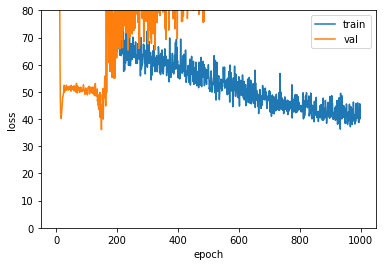

In [11]:
model = Sequential()
model.add(LSTM(260, input_shape=(3, 1), dropout = 0.2))
model.add(Dense(2,activation='relu'))
print(model.summary())

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. 모델 학습시키기
#hist = model.fit(x_train, y_train, epochs=200, batch_size=5, validation_data=(x_val, y_val))
hist = model.fit(x_train,y_train,epochs=1000,batch_size=5,validation_split=0.2)

#학습 과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 80.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

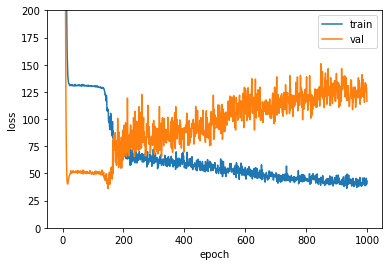

In [14]:
#학습 과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 200.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [13]:
#모델 평가
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  136.61068267822264
Validataion Score:  218.883349609375
Test Score:  184.60134240352747


In [36]:
chaba_xdata = np.array([[110, 26.000, 29.000], [115,29.000,29.400], [135,29.000,29.400], [145,23.000,29.500], 
                  [145, 26.000, 29.500], [150, 27.000, 29.500], [160, 27.000, 29.500], [175, 26.000, 29.100],
                  [145, 30.000, 29.500], [190, 25.000, 28.700], [165, 25.000, 28.600], [165, 27.000, 29.000],
                  [170, 35.000, 29.400], [170, 44.000, 28.700], [190, 56.000, 28.900], [215, 61.000, 28.600],
                  [210, 56.000, 28.900], [215, 57.000, 29.200], [205, 55.000, 29.000], [205, 52.000, 29.200],
                  [185, 50.000, 29.100], [205, 56.000, 29.100], [200, 47.000, 28.700], [195, 49.000, 29.000], [195, 61.000, 29.000]]) #입력
chaba_realdata = np.array([[15.8, 158.1],[15.6, 156.4], [15.2, 154.6], [14.7, 153.1], [14.3, 152.0], [14.4, 151.4],
                  [14.5, 150.1], [14.4, 148.7], [14.5, 146.8], [13.8, 145.2], [14.5, 144.6], [14.4, 143.5],
                  [14.3, 141.6], [14.2, 140.6], [13.6, 139.2], [13.5, 138.0], [13.7, 137.2], [14.8, 136.6],
                  [15.5, 135.9], [16.1, 135.4], [16.8, 134.7], [17.7, 133.3], [18.5, 132.5], [19.7, 131.5], [20.8, 130.4]]) #출력

In [37]:
chaba_xdata = np.asarray(chaba_xdata, dtype = np.float32)
scaler = MinMaxScaler(feature_range=(0., 1.))
chaba_xdata = scaler.fit_transform(chaba_xdata)
chaba_xdata = np.reshape(chaba_xdata, (-1, 3, 1))

chaba_realdata = np.reshape(chaba_realdata, (-1, 2))

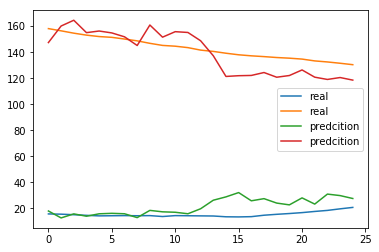

In [40]:
yhat = model.predict(chaba_xdata, verbose = 0)

plt.plot(chaba_realdata, label = "real")
plt.plot(yhat,label="predcition")
plt.legend()
plt.show()
